In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np

In [3]:
df = pd.read_csv('data/raw_sales.csv')

In [4]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [5]:
def find_anomalies(data):
    anomalies = []

    data_mean = statistics.mean(data)
    data_std = statistics.stdev(data)

    anomaly_cut_off = 3 * data_std

    lower_limit = data_mean - anomaly_cut_off
    upper_limit = data_mean + anomaly_cut_off

    for datapoint in data:
        if (datapoint > upper_limit) or (datapoint < lower_limit):
            anomalies.append(datapoint)
    
    return anomalies

In [9]:
outliers = find_anomalies(df['price'])

In [10]:
len(outliers)

461

In [12]:
df.price.skew()

4.312009366902366

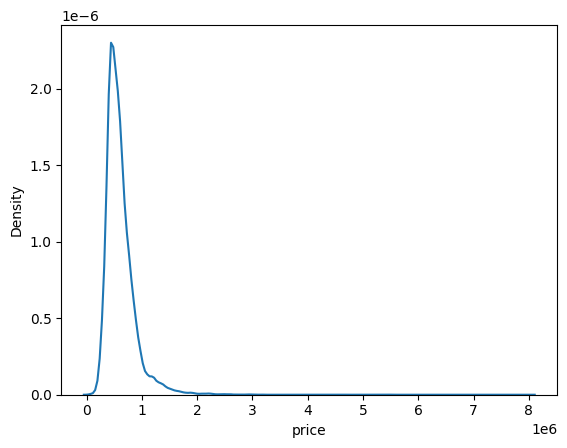

In [14]:
sns.kdeplot(df['price']);

In [15]:
df['price_transformed'] = np.log(df['price'])

In [16]:
df['price_transformed'].skew()

0.4731646269984763

<AxesSubplot:xlabel='price_transformed', ylabel='Density'>

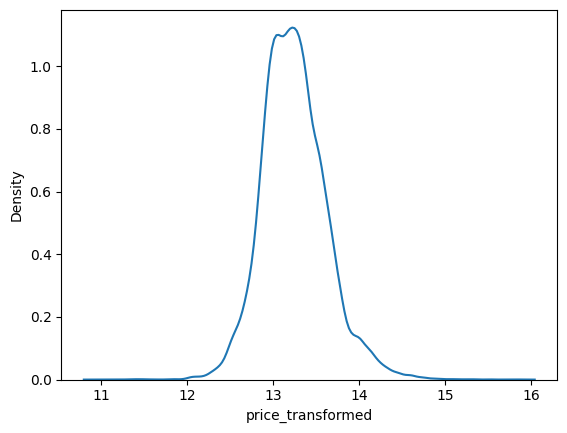

In [17]:
sns.kdeplot(df['price_transformed'])